In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile('drive/MyDrive/recyclass_v2.zip', 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/recyclass_v2'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
hdpe_dir = os.path.join(train_dir, 'hdpe')
ldpe_dir = os.path.join(train_dir, 'ldpe')
others_dir = os.path.join(train_dir, 'others')
pet_dir = os.path.join(train_dir, 'pet')
pp_dir = os.path.join(train_dir, 'pp')
ps_dir = os.path.join(train_dir, 'ps')
pvc_dir = os.path.join(train_dir, 'pvc')

In [ ]:
print('total training HDPE images:', len(os.listdir(hdpe_dir)))
print('total training LDPE images:', len(os.listdir(ldpe_dir)))
print('total training Others images:', len(os.listdir(others_dir)))
print('total training PET images:', len(os.listdir(pet_dir)))
print('total training PP images:', len(os.listdir(pp_dir)))
print('total training PS images:', len(os.listdir(ps_dir)))
print('total training PVC images:', len(os.listdir(pvc_dir)))

total training HDPE images: 105
total training LDPE images: 105
total training Others images: 105
total training PET images: 105
total training PP images: 105
total training PS images: 105
total training PVC images: 105


In [ ]:
hdpe_files = os.listdir(hdpe_dir)
print(hdpe_files[:10])

ldpe_files = os.listdir(ldpe_dir)
print(ldpe_files[:10])

others_files = os.listdir(others_dir)
print(others_files[:10])

pet_files = os.listdir(pet_dir)
print(pet_files[:10])

pp_files = os.listdir(pp_dir)
print(pp_files[:10])

ps_files = os.listdir(ps_dir)
print(ps_files[:10])

pvc_files = os.listdir(pvc_dir)
print(pvc_files[:10])

['hdpe (37).jpg', 'hdpe (77).jpg', 'hdpe (79).jpg', 'hdpe (92).jpg', 'hdpe (129).jpg', 'hdpe (73).jpg', 'hdpe (137).jpg', 'hdpe (116).jpg', 'hdpe (103).jpg', 'hdpe (112).jpg']
['ldpe (136).jpg', 'ldpe (24).jpg', 'ldpe (147).jpg', 'ldpe (91).jpg', 'ldpe (98).jpg', 'ldpe (150).jpg', 'ldpe (119).jpg', 'ldpe (137).jpg', 'ldpe (16).jpg', 'ldpe (62).jpg']
['others (93).jpg', 'others (100).jpg', 'others (24).jpg', 'others (62).jpg', 'others (16).jpg', 'others (34).jpg', 'others (40).jpg', 'others (12).jpg', 'others (132).jpg', 'others (74).jpg']
['pet (91).jpg', 'pet (18).jpg', 'pet (88).jpg', 'pet (38).jpg', 'pet (120).jpg', 'pet (97).jpg', 'pet (114).jpg', 'pet (84).jpg', 'pet (42).jpg', 'pet (60).jpg']
['pp (61).jpg', 'pp (133).jpg', 'pp (137).jpg', 'pp (110).jpg', 'pp (108).jpg', 'pp (101).jpg', 'pp (87).jpg', 'pp (105).jpg', 'pp (46).jpg', 'pp (54).jpg']
['ps (78).jpg', 'ps (103).jpg', 'ps (22).jpg', 'ps (137).jpg', 'ps (40).jpg', 'ps (54).jpg', 'ps (149).jpg', 'ps (124).jpg', 'ps (14).j

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 7
ncols = 7

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 7, nrows * 5)

pic_index += 7
hdpe = [os.path.join(hdpe_dir, fname) 
          for fname in hdpe_files[pic_index-7:pic_index]]
ldpe = [os.path.join(ldpe_dir, fname) 
          for fname in ldpe_files[pic_index-7:pic_index]]
others = [os.path.join(others_dir, fname) 
          for fname in others_files[pic_index-7:pic_index]]
pet = [os.path.join(pet_dir, fname) 
          for fname in pet_files[pic_index-7:pic_index]]
pp = [os.path.join(pp_dir, fname) 
          for fname in pp_files[pic_index-7:pic_index]]
ps = [os.path.join(ps_dir, fname) 
          for fname in ps_files[pic_index-7:pic_index]]
pvc = [os.path.join(pvc_dir, fname) 
          for fname in pvc_files[pic_index-7:pic_index]]

for i, img_path in enumerate(hdpe + ldpe + others + pet + pp + ps + pvc):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(weights='imagenet', 
                       include_top=False, 
                       input_shape=(224, 224, 3))

base_model.trainable = False

base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
DENSE_LAYER = 512
DROPOUT_LAYER = 0.2

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Rescaling(1.0/255.0, input_shape=(224, 224, 3)),  
    layers.RandomFlip(mode='horizontal'),
    base_model,
    layers.Flatten(),
    layers.Dropout(DROPOUT_LAYER),
    layers.Dense(DENSE_LAYER, activation='relu'),
    layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dropout (Dropout)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                        

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 8
TARGET_SIZE = (224, 224)
IMAGE_SIZE = (224, 224)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train = image_dataset_from_directory(
    directory=train_dir,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42)

val = image_dataset_from_directory(
    directory=val_dir,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False)

Found 735 files belonging to 7 classes.
Found 315 files belonging to 7 classes.


In [ ]:
history = model.fit(
    train,
    validation_data=val,
    epochs=10,
    verbose=2)

Epoch 1/10
92/92 - 100s - loss: 5.2504 - accuracy: 0.8163 - val_loss: 0.7473 - val_accuracy: 0.9429 - 100s/epoch - 1s/step
Epoch 2/10
92/92 - 95s - loss: 0.4898 - accuracy: 0.9524 - val_loss: 0.2809 - val_accuracy: 0.9810 - 95s/epoch - 1s/step
Epoch 3/10
92/92 - 90s - loss: 0.3335 - accuracy: 0.9701 - val_loss: 0.8131 - val_accuracy: 0.9524 - 90s/epoch - 978ms/step
Epoch 4/10
92/92 - 90s - loss: 0.3810 - accuracy: 0.9755 - val_loss: 0.4428 - val_accuracy: 0.9746 - 90s/epoch - 977ms/step
Epoch 5/10
92/92 - 82s - loss: 0.2179 - accuracy: 0.9837 - val_loss: 0.2654 - val_accuracy: 0.9841 - 82s/epoch - 896ms/step
Epoch 6/10
92/92 - 89s - loss: 0.0736 - accuracy: 0.9918 - val_loss: 0.2607 - val_accuracy: 0.9714 - 89s/epoch - 964ms/step
Epoch 7/10
92/92 - 90s - loss: 0.1110 - accuracy: 0.9891 - val_loss: 1.2180 - val_accuracy: 0.9333 - 90s/epoch - 974ms/step
Epoch 8/10
92/92 - 87s - loss: 0.1136 - accuracy: 0.9918 - val_loss: 0.7840 - val_accuracy: 0.9429 - 87s/epoch - 949ms/step
Epoch 9/10
9

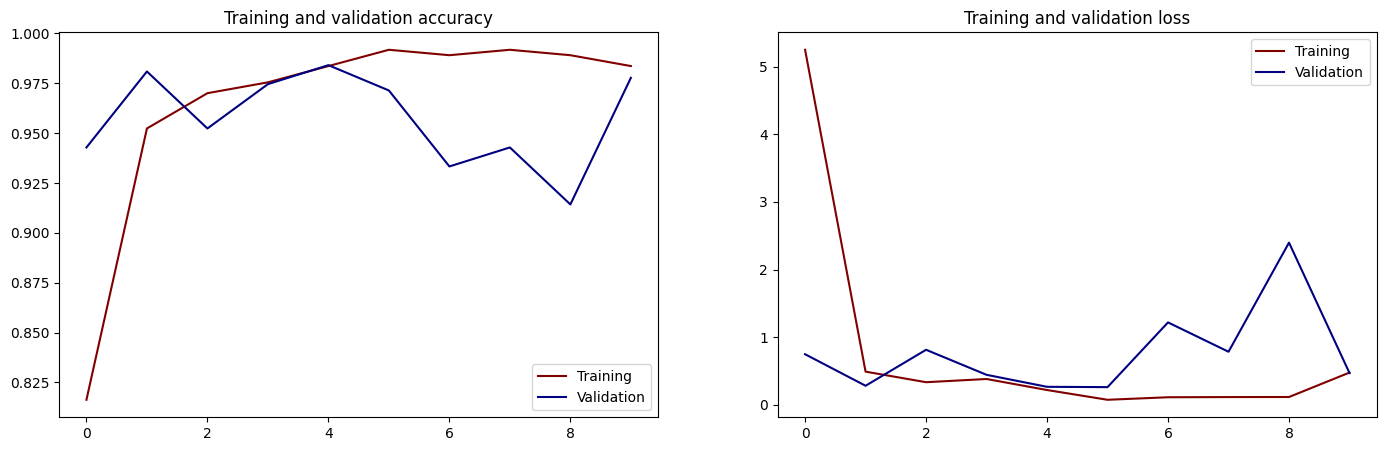

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_acc = range(len(acc))
epochs_loss = range(len(loss))

fig, (acc_fig, loss_fig) = plt.subplots(1, 2, figsize=(17, 5))

acc_fig.plot(epochs_acc, acc, '#800000', label='Training accuracy')
acc_fig.plot(epochs_acc, val_acc, '#000080', label='Validation accuracy')
acc_fig.set_title('Training and validation accuracy')
acc_fig.legend(["Training", "Validation"], loc ="lower right")

loss_fig.plot(epochs_loss, loss, '#800000', label='Training loss')
loss_fig.plot(epochs_loss, val_loss, '#000080', label='Validation loss')
loss_fig.set_title('Training and validation loss')
loss_fig.legend(["Training", "Validation"], loc ="upper right")

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)
  
  print('HDPE', '{:.5f}'.format(classes[0, 0]))
  print('LDPE', '{:.5f}'.format(classes[0, 1]))
  print('Others', '{:.5f}'.format(classes[0, 2]))
  print('PET', '{:.5f}'.format(classes[0, 3]))
  print('PP', '{:.5f}'.format(classes[0, 4]))
  print('PS', '{:.5f}'.format(classes[0, 5]))
  print('PVC', '{:.5f}'.format(classes[0, 6]))

  # print(classes)

Saving ldpe (87).jpg to ldpe (87).jpg
1/1 [==============================] - 0s 90ms/step
ldpe (87).jpg
HDPE 0.00000
LDPE 1.00000
Others 0.00000
PET 0.00000
PP 0.00000
PS 0.00000
PVC 0.00000


In [ ]:
model.save('recyclass_v2.h5')

In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

In [ ]:
import tensorflow as tf

tf.saved_model.save(model, 'recyclass_v2.pb')